In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import signal

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [2]:
df_real_signal = pd.read_csv("../../data/ground/ol_ground_single_cycle_cell.csv")

In [3]:
df_real_signal

,Voltage [V],Current [A],Time,Tdiff [s],T_amb [degC]
0,3.914571,6.0750,2024-06-06 14:05:45,1.000,24.911
1,3.913429,6.0750,2024-06-06 14:05:46,1.000,24.911
2,3.912857,5.8880,2024-06-06 14:05:47,1.003,24.942
3,3.912000,5.9680,2024-06-06 14:05:48,1.084,24.911
4,3.911571,5.9150,2024-06-06 14:05:49,1.001,24.911
...,...,...,...,...,...
16238,3.985571,-10.8015,2024-06-06 18:41:39,0.999,26.031
16239,3.985714,-10.8280,2024-06-06 18:41:40,1.007,26.031
16240,3.985857,-10.7750,2024-06-06 18:41:41,1.022,26.031
16241,3.986000,-10.9085,2024-06-06 18:41:42,1.053,26.000


<Axes: >

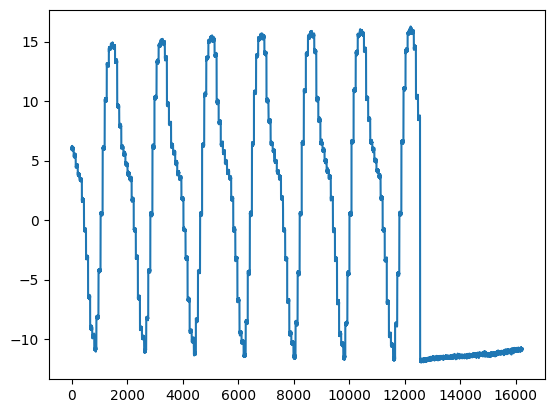

In [5]:
df_real_signal['Current [A]'].plot()

In [29]:
t = np.linspace(0, 162000, 162000)
f = 20 * signal.square(2 *np.pi * t / 1500)

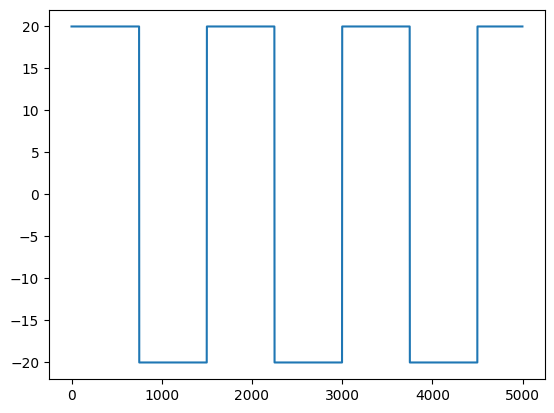

In [36]:
plt.plot(f[:5000])

In [31]:
df_socH = pd.read_csv("../../data/ground/ground_amp0_8.csv")

In [32]:
df_socH = df_socH[:162000]

In [33]:
df_socH['Current [A]'] = f.tolist()

In [37]:
df_socH['Time'] = [t for t in range(0, len(f))]

In [38]:
df_socH

,Current [A],Time
0,20.0,0
1,20.0,1
2,20.0,2
3,20.0,3
4,20.0,4
...,...,...
161995,-20.0,161995
161996,-20.0,161996
161997,-20.0,161997
161998,-20.0,161998


In [39]:
df_socH.to_csv("../../data/ground/ground_square_current_20.csv", index=False)